In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# load data
acc = np.load('MDSAGT_V1 2022-05-23 10-48-50/acc_manu_1_quad.npy')
gyr = np.load('MDSAGT_V1 2022-05-23 10-48-50/gyr_manu_1_quad.npy')
print(acc.shape, gyr.shape)

(5879, 4) (5877, 4)


# Create Butterworth Low Pass Filter

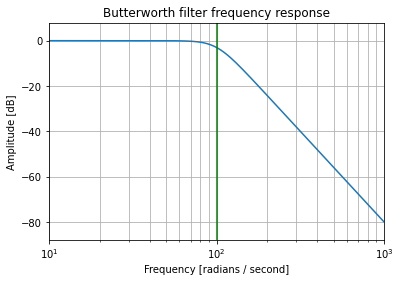

In [3]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

# Filter Acceleration Data

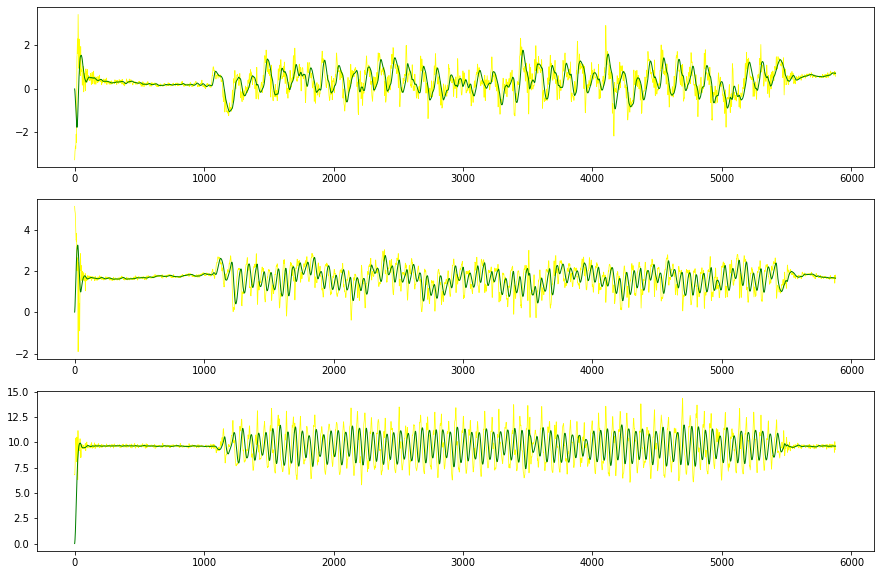

In [4]:
sos = signal.butter(2, 100, fs=5879, output='sos')
filtered_x = signal.sosfilt(sos, acc[:,1])
filtered_y = signal.sosfilt(sos, acc[:,2])
filtered_z = signal.sosfilt(sos, acc[:,3])



plt.figure(figsize=(15, 10))
plt.title('Butterworth Acceleration')
plt.subplot(3, 1, 1)
plt.plot(acc[:,1], color='yellow', linewidth=0.75)
plt.plot(filtered_x, color='green', linewidth=1.0)

plt.subplot(3, 1, 2)
plt.plot(acc[:,2], color='yellow', linewidth=0.75)
plt.plot(filtered_y, color='green', linewidth=1.0)

plt.subplot(3, 1, 3)
plt.plot(acc[:,3], color='yellow', linewidth=0.75)
plt.plot(filtered_z, color='green', linewidth=1.0)

plt.show()

In [5]:
#filtered_acc = np.concatenate((acc[:,3], filtered_x, filtered_y, filtered_z), axis=1)
acc_shape = acc.shape
an_array = np.zeros(acc_shape)
an_array[:,0] = acc[:,0]
an_array[:,1] = filtered_x
an_array[:,2] = filtered_y
an_array[:,3] = filtered_z
print(an_array.shape)

(5879, 4)


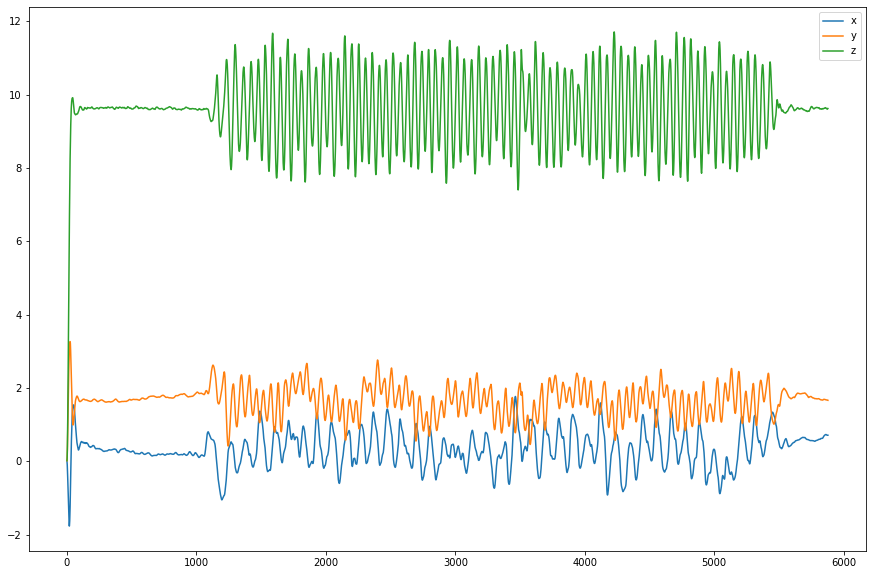

In [6]:
plt.figure(figsize=(15, 10))

plt.plot(an_array[:,1], label='x')
plt.plot(an_array[:,2], label='y')
plt.plot(an_array[:,3], label='z')
plt.legend()
plt.show()

# Filter Gyroscope Data

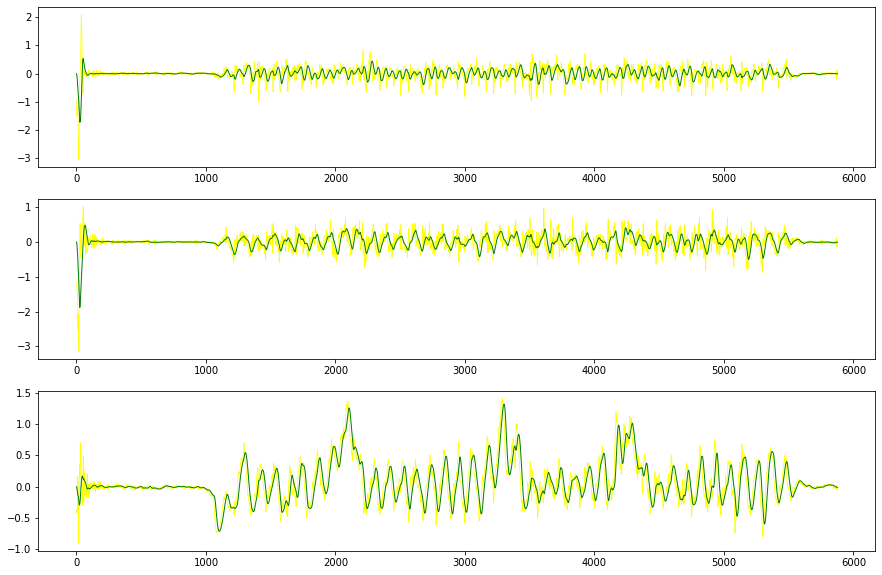

In [7]:
sos = signal.butter(2, 100, fs=5877, output='sos')
filtered_x_gyr = signal.sosfilt(sos, gyr[:,1])
filtered_y_gyr = signal.sosfilt(sos, gyr[:,2])
filtered_z_gyr = signal.sosfilt(sos, gyr[:,3])



plt.figure(figsize=(15, 10))
plt.title('Butterworth Acceleration')
plt.subplot(3, 1, 1)
plt.plot(gyr[:,1], color='yellow', linewidth=0.75)
plt.plot(filtered_x_gyr, color='green', linewidth=1.0)

plt.subplot(3, 1, 2)
plt.plot(gyr[:,2], color='yellow', linewidth=0.75)
plt.plot(filtered_y_gyr, color='green', linewidth=1.0)

plt.subplot(3, 1, 3)
plt.plot(gyr[:,3], color='yellow', linewidth=0.75)
plt.plot(filtered_z_gyr, color='green', linewidth=1.0)

plt.show()

In [8]:
#filtered_acc = np.concatenate((acc[:,3], filtered_x, filtered_y, filtered_z), axis=1)
gyr_shape = gyr.shape
gyr_array = np.zeros(gyr_shape)
gyr_array[:,0] = gyr[:,0]
gyr_array[:,1] = filtered_x_gyr
gyr_array[:,2] = filtered_y_gyr
gyr_array[:,3] = filtered_z_gyr
print(gyr_array.shape)

(5877, 4)


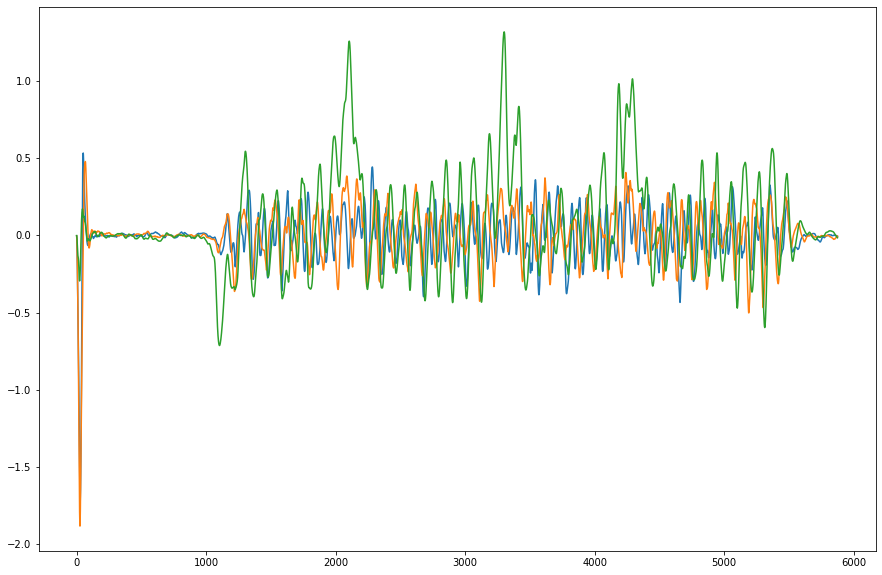

In [9]:
plt.figure(figsize=(15, 10))

plt.plot(gyr_array[:,1])
plt.plot(gyr_array[:,2])
plt.plot(gyr_array[:,3])

# Save Data

In [10]:
np.save('MDSAGT_V1 2022-05-23 10-48-50/acc_butt_manu_1_quad.npy', an_array)
np.save('MDSAGT_V1 2022-05-23 10-48-50/gyr_butt_manu_1_quad.npy', gyr_array)